Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Vicent Ripoll Ramírez"
COLLABORATORS = ""

---

<div class=WordSection1>

<h1>PEC 2: Ejecución de trabajos mediante el gestor de recursos YARN</h1>

<h2 style='margin-left:18.0pt;text-indent:-18.0pt'>0<span style='font:7.0pt "Times New Roman"'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
</span> Nota</h2>
<p class=MsoNormal>En muchos de los ejercicios se deberán realizar <b>capturas de pantalla que justifiquen las respuestas</b>. Las capturas de pantalla se pueden realizar con las herramientas del sistema operativo que estéis utilizando. Para copiar la imagen en el portapapeles podéis utilizar diferentes métodos: "Herramienta de Recortes" en Windows, "Imprimir pantalla", Ctrl+C al seleccionar una imagen, etc.... Las imágenes una vez capturadas se pueden pegar directamente en las celdas de respuesta, mediante Ctrl+V o con el menú contextual que aparece con el botón derecho del ratón, lo que pegará la imagen que esté en el portapapeles. Para ver la imagen se debe ejecutar la celda. </p>

<h2 style='margin-left:18.0pt;text-indent:-18.0pt'>1<span style='font:7.0pt "Times New Roman"'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
</span> Introducción</h2>

<p class=MsoNormal>Hasta ahora en los ejercicios realizados hemos visto como
ejecutar trabajos en un entorno Big Data pero no nos hemos fijado en como estos
trabajan, interactúan y se ejecutan  dentro del sistema. Este es precisamente
el objetivo de este ejercicio. </p>

<p class=MsoNormal><span style='line-height:115%'>Antes de empezar con el
anunciado de la PEC, vamos a revisar un poco la composición del sistema Big
Data que estáis usando. En la siguiente imagen, mediante el Cloudera Manager, el
gestor del sistema que utilizamos<a href="https://www.cloudera.com/products/open-source/apache-hadoop/key-cdh-components.html" name="_ftnref1" title=""><span
class=MsoFootnoteReference><span class=MsoFootnoteReference><span
style='font-size:12.0pt;line-height:115%;font-family:"Calibri",sans-serif'>[CDH Components]</span></span></span></a>
,  podemos ver como está configurado el gestor de recursos Yarn. Es interesante
ver (Figura 1) que en nuestro caso el clúster está compuesto por 4 máquinas,
una principal, y más grande, y tres más modestas. Podéis ver las
características de las máquinas en las diversas columnas de la izquierda. En
vuestro caso, cuando accedéis al sistema, lo hacéis mediante la máquina
“eimtcld.uoc.edu”. </span></p>

<p class=MsoNormal align=center style='text-align:center'><span
style='line-height:115%'><img id="Picture 25"
src="image001.png"
alt="Graphical user interface, application&#10;&#10;Description automatically generated"></span></p>

<p class=MsoNormal align=center style='text-align:center'><span
style='font-size:9.0pt;line-height:115%'>Figura 1:  Descripción del sistema
Cloudera instalado para la realización del las prácticas.</span></p>

<p class=MsoNormal><span style='line-height:115%'>En la Figura 2 podéis ver la
configuración del resource manager usado, el Yarn. Vemos que cada una de las
máquinas está corriendo un “Node manager” de Yarn gestionado por el “Resource Manager”
que se ejecuta en la máquina principal. Si no recordáis bien estos conceptos
podéis revisar la Sección 5 del contenido teórico del módulo actual.</span></p>

<p class=MsoNormal><span style='line-height:115%'>Por lo tanto, cualquier
proceso que se ejecute mediante Yarn se va a ejecutar (si lo considera
necesario) utilizando todos los recursos del sistema. En este ejercicio vamos a
ver como usar Yarn, como analizar las características del programa ejecutado y como
ha finalizado la ejecución.</span></p>

<p class=MsoNormal align=center style='text-align:center'><span
style='font-size:9.0pt;line-height:115%'>&nbsp;</span></p>

<p class=MsoNormal align=center style='text-align:center'><span
style='line-height:115%'><img id="Picture 24"
src="image002.png"
alt="Graphical user interface, application&#10;&#10;Description automatically generated"></span></p>

<p class=MsoNormal align=center style='text-align:center'><span
style='font-size:9.0pt;line-height:115%'>Figura 2:  Configuración del gestor de
recursos Yarn en la máquina usada en la asignatura.</span></p>

<p class=MsoNormal>Si revisamos la configuración del Spark Context que estábamos
usando hasta ahora en los notebooks:</p>

<p class=MsoNormal><span lang=EN-US style='font-size:12.0pt;line-height:115%;
font-family:"Courier New"'>sc =
pyspark.SparkContext(master=&quot;local[1]&quot;, appName=&quot;PAC1_vuestro_loginUOC&quot;)</span></p>

<p class=MsoNormal><span style='line-height:115%'>podemos ver que el parámetro </span><span
style='font-size:12.0pt;line-height:115%;font-family:"Courier New"'>master=&quot;local[1]&quot;</span><span
style='line-height:115%'> indica que el programa sólo se ejecutará usando la
máquina </span><span style='font-size:9.0pt;line-height:115%;font-family:"Courier New"'>local[1]</span><span
style='line-height:115%'>. Para entender bien los parámetros de configuración,
se recomienda revisar el manual de referencia<a href="https://spark.apache.org/docs/2.1.1/programming-guide.html#initializing-spark" name="_ftnref2"
title=""><span class=MsoFootnoteReference><span class=MsoFootnoteReference><span
style='font-size:12.0pt;line-height:115%;font-family:"Calibri",sans-serif'>[Spark Programming Guide]</span></span></span></a>.
Por lo tanto, en los ejercicios ejecutados mediante notebooks Jupyter, no
estamos utilizando el gestor de recursos, sino que ejecutamos los programas
solamente utilizando la máquina principal.  Para configurar el Spark Context
mediante el gestor de recursos solo haría falta cambiar el parámetro </span><span
style='font-size:12.0pt;line-height:115%;font-family:"Courier New"'>master=&quot;local[1]&quot;</span><span
style='line-height:115%'> por </span><span style='font-size:12.0pt;line-height:
115%;font-family:"Courier New"'>master=&quot;yarn&quot;</span><span
style='line-height:115%'>. Aun así, en esta PEC nosotros vamos a lanzar los
programas directamente desde la terminal de Linux mediante el comando </span><span
style='font-size:12.0pt;line-height:115%;font-family:"Courier New"'>spark-submit</span><span
style='line-height:115%'>.</span></p>

 <h2 style='margin-left:18.0pt;text-indent:-18.0pt'>2<span style='font:7.0pt "Times New Roman"'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>Ejecución de Spark (2.5 puntos)</h2>

<h3 style='margin-left:18.0pt;text-indent:-18.0pt'><b>2.1<span
style='font:7.0pt "Times New Roman"'>&nbsp; </span></b>Descripción del programa
SparkPi (0.5 puntos)</h3>

<p class=MsoNormal>El este ejercicio práctico vamos a trabajar sobre un
programa ya compilado y preparado para ejecutarse. El programa que vamos a usar
es un ejemplo que viene incorporado en la instalación de Cloudera, se suele usar
como ejemplo base para realizar tareas de comprobación de operatividad del
sistema y rendimiento. Podéis encontrar el programa en:</p>

<p class=MsoNormal><span style='font-size:12.0pt;line-height:115%;font-family:
"Courier New"'>/opt/cloudera/parcels/CDH/lib/spark/examples/jars/spark-examples_2.11-2.4.0-cdh6.2.0.jar</span></p>

<p class=MsoNormal>Como podéis ver el programa está construido en Java, pero no
vamos a modificarlo. Solo lo vamos a ejecutar en el siguiente apartado.</p>

<p class=MsoNormal align=left style='margin-bottom:8.0pt;text-align:left;
line-height:107%'>&nbsp;</p>

<p class=MsoNormal>En este primer apartado se pide que describáis: </p>

<p class=MsoListParagraphCxSpFirst style='text-indent:-18.0pt'><span
style='font-family:Symbol'>·<span style='font:7.0pt "Times New Roman"'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
</span></span>¿Qué hace el programa?</p>

Da una aproximación del valor de pi.

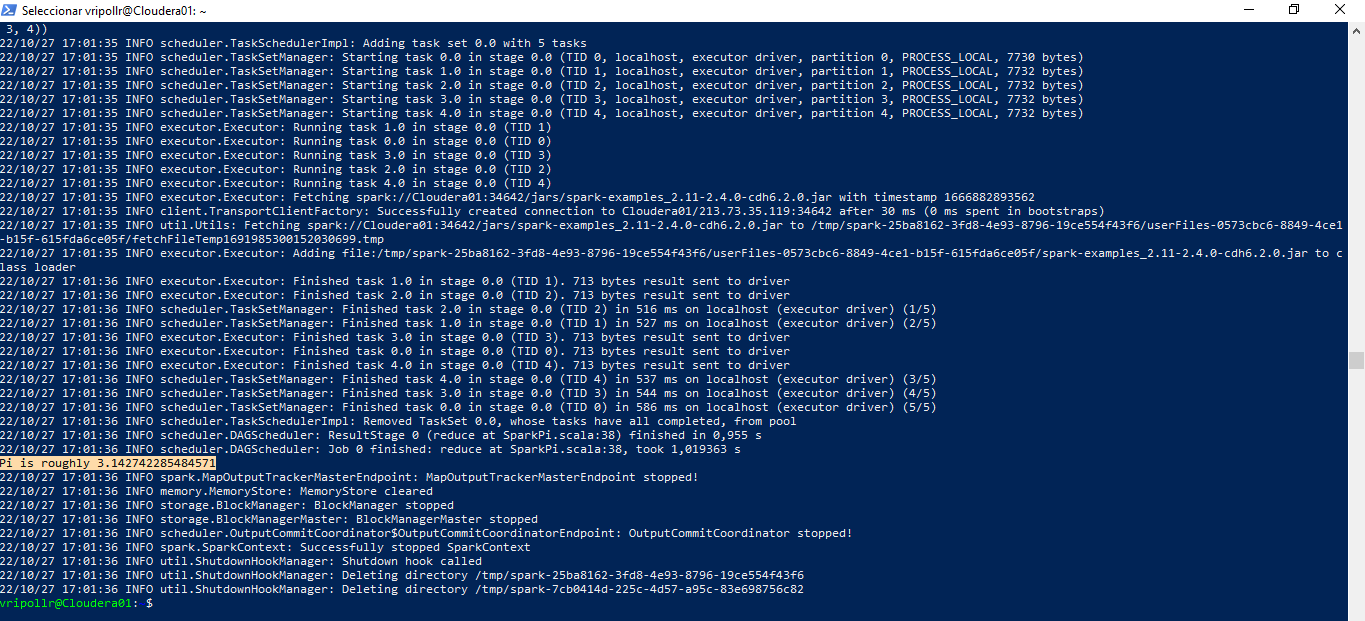

<p class=MsoListParagraphCxSpMiddle style='text-indent:-18.0pt'><span
style='font-family:Symbol'>·<span style='font:7.0pt "Times New Roman"'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
</span></span>¿Cómo lo hace?</p>

Mediante la aplicación Spark Pi, que implementa una variación del problema clásico de probabilidad de la "Aguja de Bufón".
Concretamente, define el cuadrado de vértices (0,0), (0,1), (1,0) y (1,1) así como la circunferencia inscrita, centrada en (0.5,0.5). El programa genera puntos en este cuadrado y cuenta cuántos de ellos caen en la circunferencia. Nótese que el área del cuadrado es 1 y la de la circunferencia pi/4. La ley de grandes números asegura que los ensayos que realiza el programa tienden al ratio entre ambas áreas, que es pi/4. Por este motivo, el programa finaliza multiplicando por 4.

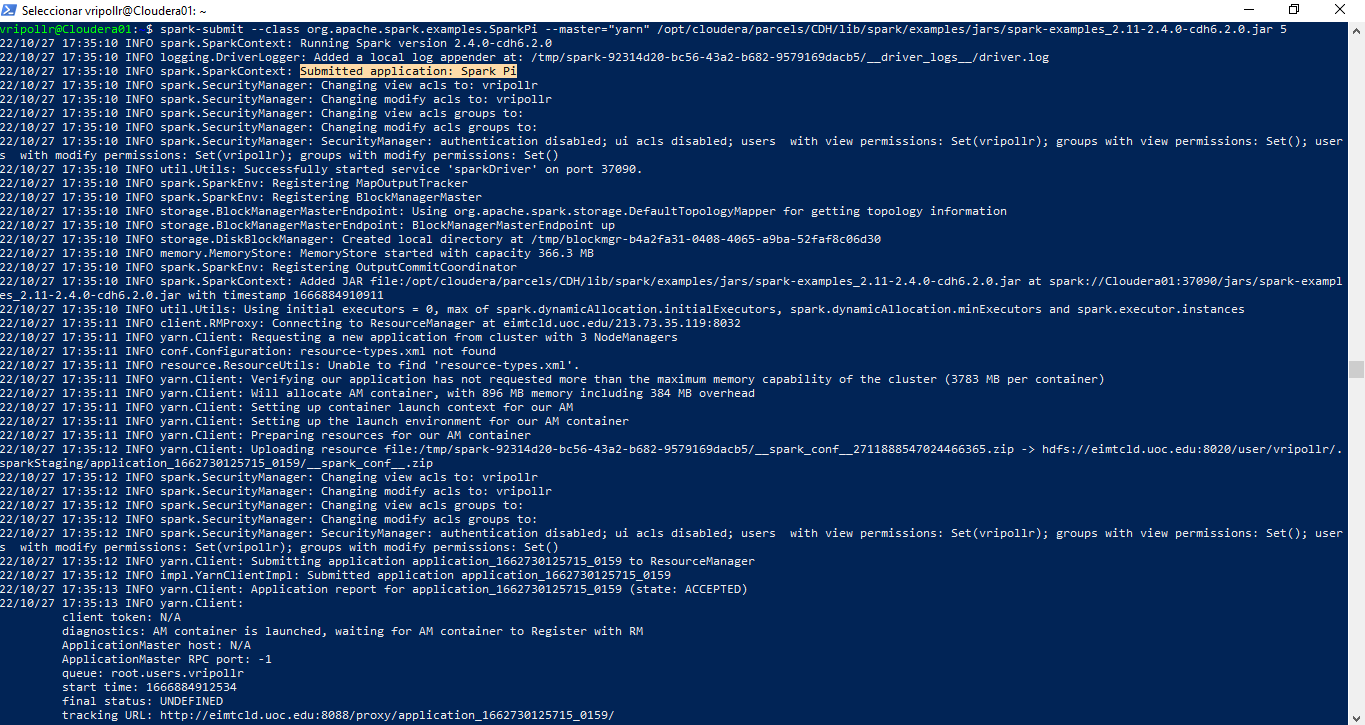

El código se puede consultar en https://github.com/apache/spark/blob/master/examples/src/main/python/pi.py

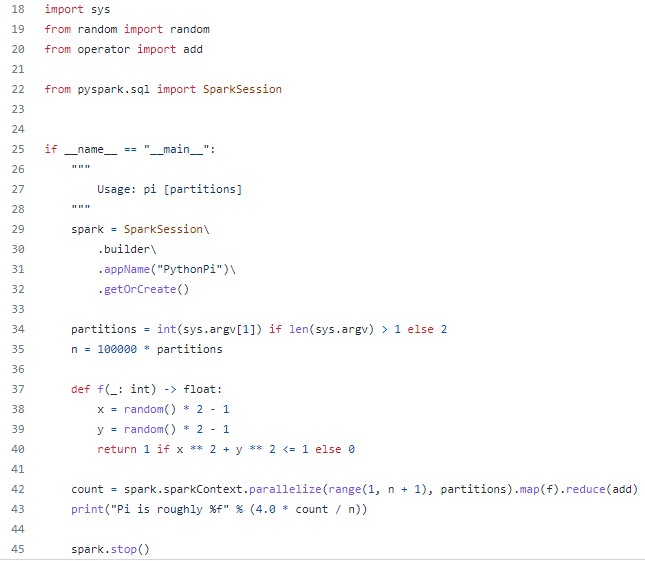

<p class=MsoListParagraphCxSpLast style='text-indent:-18.0pt'><span
style='font-family:Symbol'>·<span style='font:7.0pt "Times New Roman"'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
</span></span>¿Qué parámetros recibe para su ejecución y para que sirven?</p>

Recibe el número de puntos que se desean generar dentro del cuadrado. Este número sirve para estimar el número pi mediante el procedimento que se ha descrito. Cuanto mayor sea el número, la aproximación será más exacta.

<h3 style='margin-left:18.0pt;text-indent:-18.0pt'><b>2.2<span
style='font:7.0pt "Times New Roman"'>&nbsp; </span></b>Ejecución (1 puntos)</h3>

<p class=MsoNormal>Revisad la documentación de Cloudera<a href="https://docs.cloudera.com/runtime/7.2.1/running-spark-applications/topics/spark-running-spark-apps-on-yarn.html"
name="_ftnref3" title=""><span class=MsoFootnoteReference><span
class=MsoFootnoteReference><span style='font-size:12.0pt;line-height:115%;
font-family:"Calibri",sans-serif'>[Running Spark applications on YARN]</span></span></span></a> y ejecutad el
programa usando Yarn en modo cliente, con una memoria por ejecutor de 1
gigabyte y configurando el programa SparkPi para usar 10 particiones. Debéis
ejecutar el programa mediante una terminal (logeados vía ssh o directamente con
el terminal de Jupyter), mediante el comando spark-submit.</p>

<p class=MsoNormal>Una vez ejecutado, el resultado esperado debe ser parecido
al siguiente:</p>

<p class=MsoNormal><img 
id="Imagen 1" src="image004.jpg"
alt="Graphical user interface, text&#10;&#10;Description automatically generated"></p>



spark-submit --class org.apache.spark.examples.SparkPi --master yarn --executor-memory 1G --deploy-mode client /opt/cloudera/parcels/CDH/lib/spark/examples/jars/spark-examples_2.11-2.4.0-cdh6.2.0.jar 10

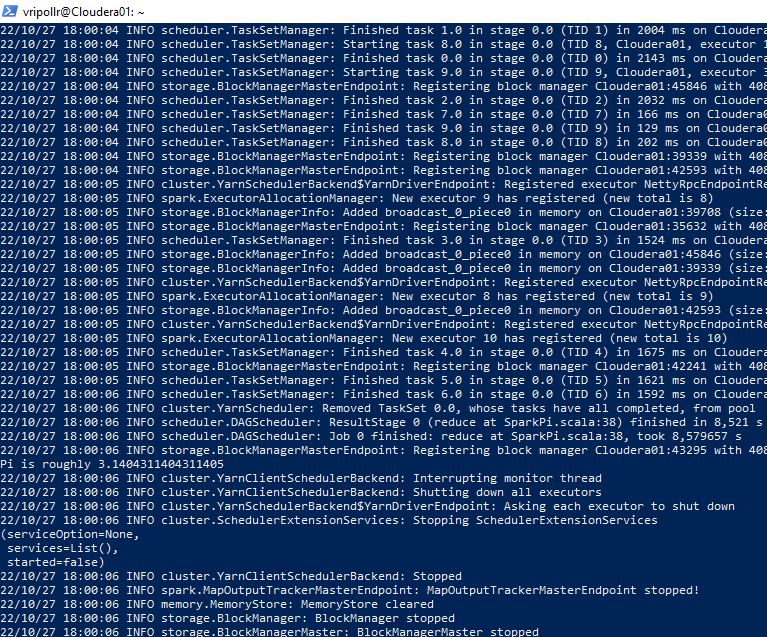

<h3 style='margin-left:18.0pt;text-indent:-18.0pt'><b>2.3<span
style='font:7.0pt "Times New Roman"'>&nbsp; </span></b>Modos de ejecución (1
puntos)</h3>
<p class=MsoNormal>¿Qué diferencia hay entre ejecutar una aplicación de Spark en
YARN en modo cliente o modo clúster? ¿En que casos utilizarías cada uno de
estos modos?</p>

Tal y como se explica en https://spark.apache.org/docs/1.6.2/running-on-yarn.html#configuration, en el modo clúster el driver de Spark se ejecuta en el application master, mientras que en el modo cliente el driver se ejecuta en el proceso del cliente.
En otras palabras, en modo client cuando un usuario envía un spark submit (formado por el driver program y los executor program), el driver program se ejecuta en el edge node ocupando memoria. En el modo cluster, el driver aunque es enviado al edge node, se envía a las máquinas del clúster para ser ejecutado en función de los recursos disponibles.
Para trabajar en modo producción es preferible el modo clúster porque incluso si la cuenta con que se trebaja se desactiva el programa se seguirá ejecutado. En el modo cliente esto no sucede. Así, se prefiere el modo cliente en tareas menos importantes como las de testeo.
Como consecuencia del funcionamiento del modo cliente, una desventaja importante de este es que si hay varias personas enviando tareas de Spark al edge node, todos los drivers correspondientes a estas tareas serán ejecutados en este mismo edge node lo que puede implicar una falta de recursos para algunos de estos drivers. En el modo clúster, los drivers no se ejecutan en el edge node sino que es el edge node el que gestiona donde tienen que ejecutarse estos drivers. Esta gestión permite distribuir los recursos de una forma más eficiente.
De nuevo, en tareas de producción es preferible el modo clúster debido a que habrá menos posibilidades de encontrarse con problemas de memoria.

<h2 style='margin-left:18.0pt;text-indent:-18.0pt'>3<span style='font:7.0pt "Times New Roman"'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
</span>Spark History Server (5 puntos)</h2>

<p class=MsoNormal>En este bloque de preguntas vamos a trabajar con la
herramienta de monitorización que ofrece Spark. Entrar en la Web UI del Spark
history Server<a href="https://docs.cloudera.com/documentation/enterprise/6/6.2/topics/operation_spark_applications.html" name="_ftnref4" title=""><span
class=MsoFootnoteReference><span class=MsoFootnoteReference><span
style='font-size:12.0pt;line-height:115%;font-family:"Calibri",sans-serif'>[Monitoring Spark Applications]</span></span></span></a>
habilitando primero un túnel SSH:</p>

<p class=MsoNormal>http://localhost:18088</p>

<p class=MsoNormal>y contestar a las siguientes preguntas (todas las respuestas
se deben acompañar de evidencias con capturas de pantalla). Revisad con cuidado
la información que os da el Spark History Server ya que no solo aparecen
vuestros programas. </p>

<h3 style='margin-left:18.0pt;text-indent:-18.0pt'><b>3.1<span
style='font:7.0pt "Times New Roman"'>&nbsp; </span></b>¿Cuál ha sido el
identificador de aplicación que nos ha asignado YARN cuando hemos ejecutado
nuestro programa? (0.5 punto)</h3>

application_1662730125715_0167

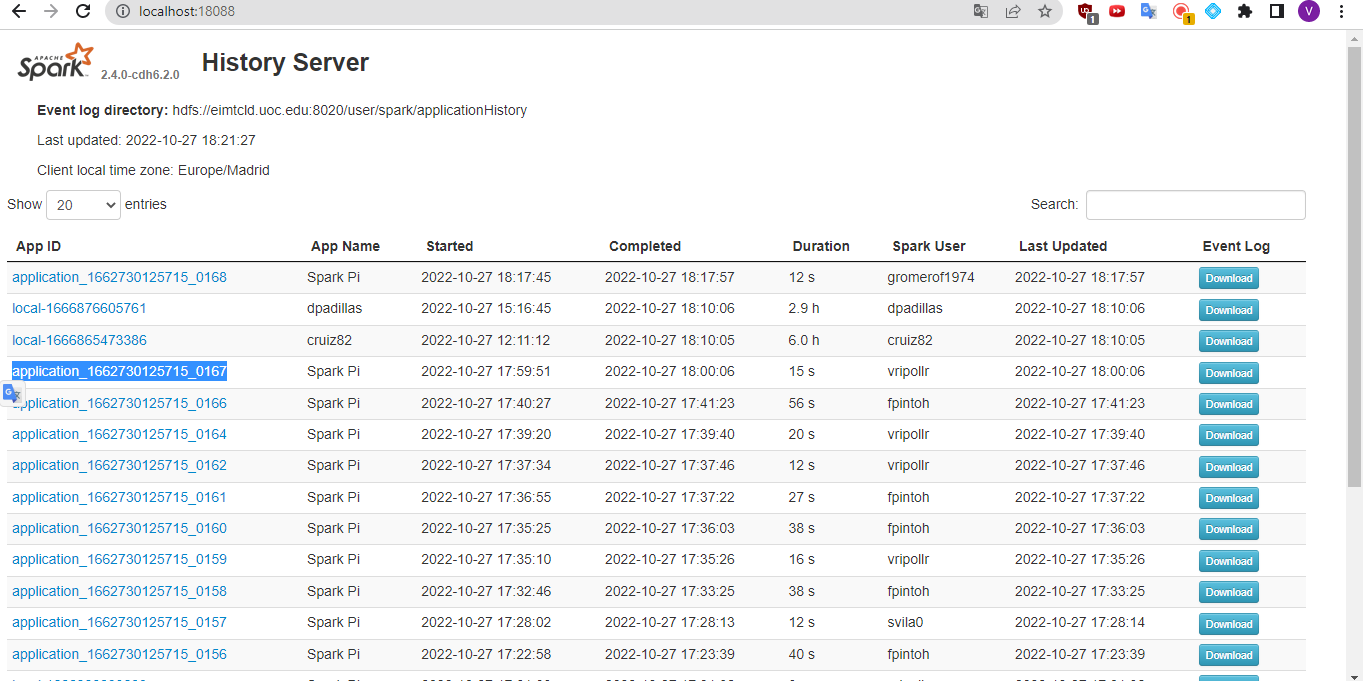

<h3 style='margin-left:18.0pt;text-indent:-18.0pt'><b>3.2<span
style='font:7.0pt "Times New Roman"'>&nbsp; </span></b>¿Qué tiempo ha durado la
ejecución? (0.5 punto)</h3>

15 segundos

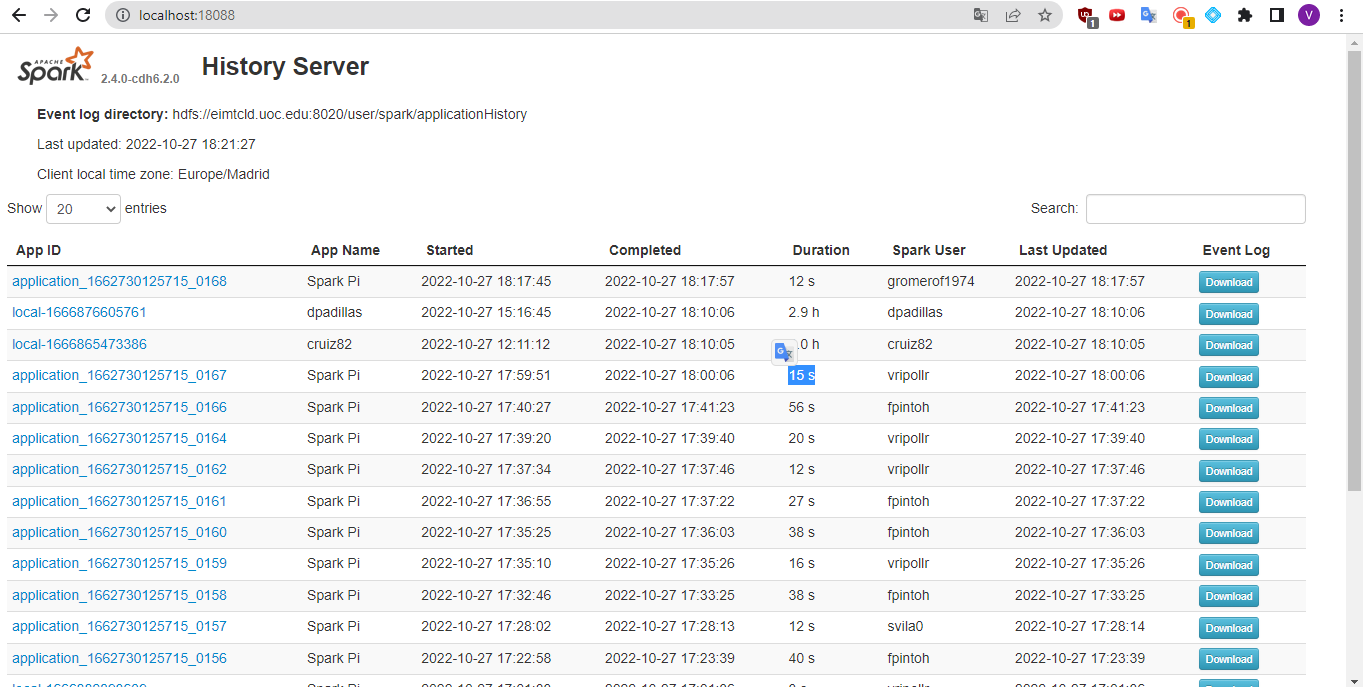

<h3 style='margin-left:18.0pt;text-indent:-18.0pt'><b>3.3<span
style='font:7.0pt "Times New Roman"'>&nbsp; </span></b>¿Cuántos executors han
intervenido durante nuestra ejecución y en que nodo se han levantado? (0.5
punto)</h3>

Si se ejecuta el siguiente código:
spark-submit --class org.apache.spark.examples.SparkPi --master yarn --executor-memory 1G --deploy-mode client /opt/cloudera/parcels/CDH/lib/spark/examples/jars/spark-examples_2.11-2.4.0-cdh6.2.0.jar 10
Se obtiene:

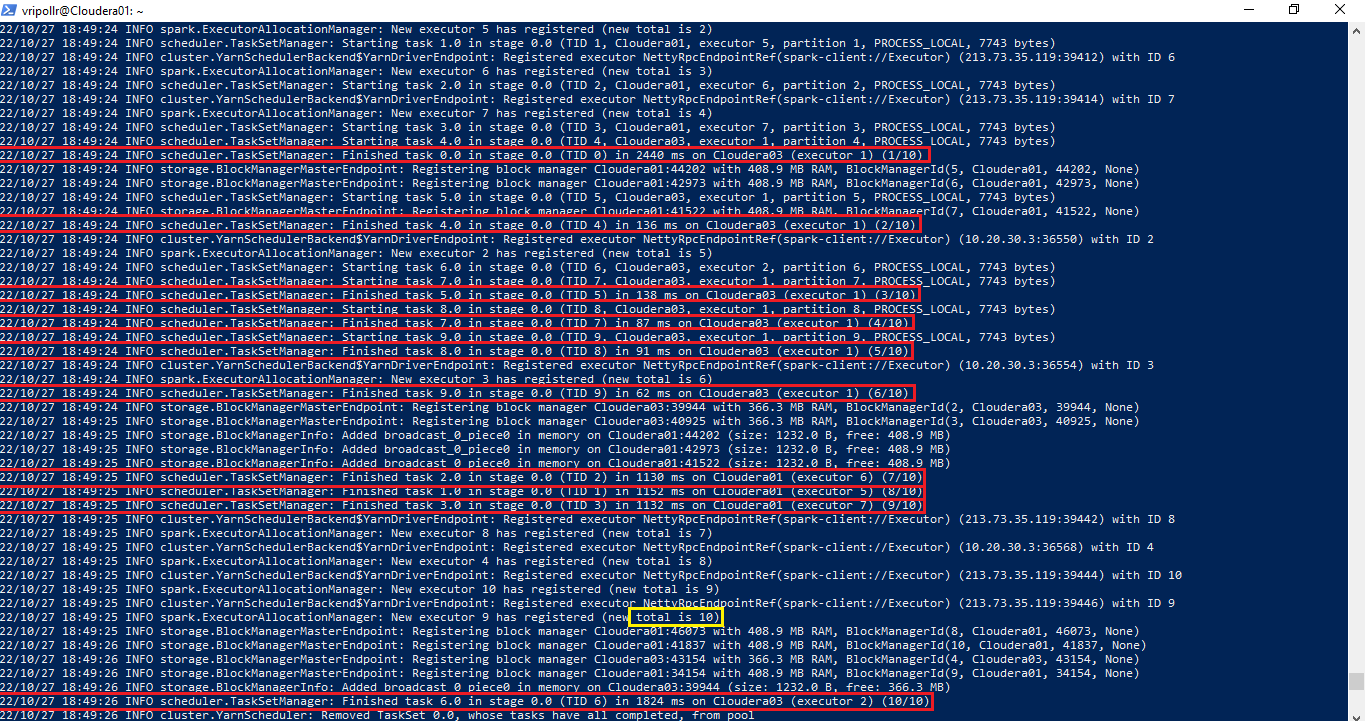

Se observa que se han creado 10, pero en las 10 tasks que se querían aplicar han intervenido 5: executors 1, 2, 5, 6 y 7.
El executor 1 se ha levantado en el nodo Cloudera 03
El executor 2, en Cloudera 03
El executor 5, en Cloudera 01
El executor 6, en Cloudera 01
El executor 7, en Cloudera 01

<h3 style='margin-left:18.0pt;text-indent:-18.0pt'><b>3.4<span
style='font:7.0pt "Times New Roman"'>&nbsp; </span></b>¿Cuántas Tasks se han
ejecutado para nuestro job? (0.5 punto)</h3>

Se ejecutan 10. Se observa que el TaskSetManager gestiona el inicio y el fin de 10 tasks: task 0.0, 1.0,..., 9.0.

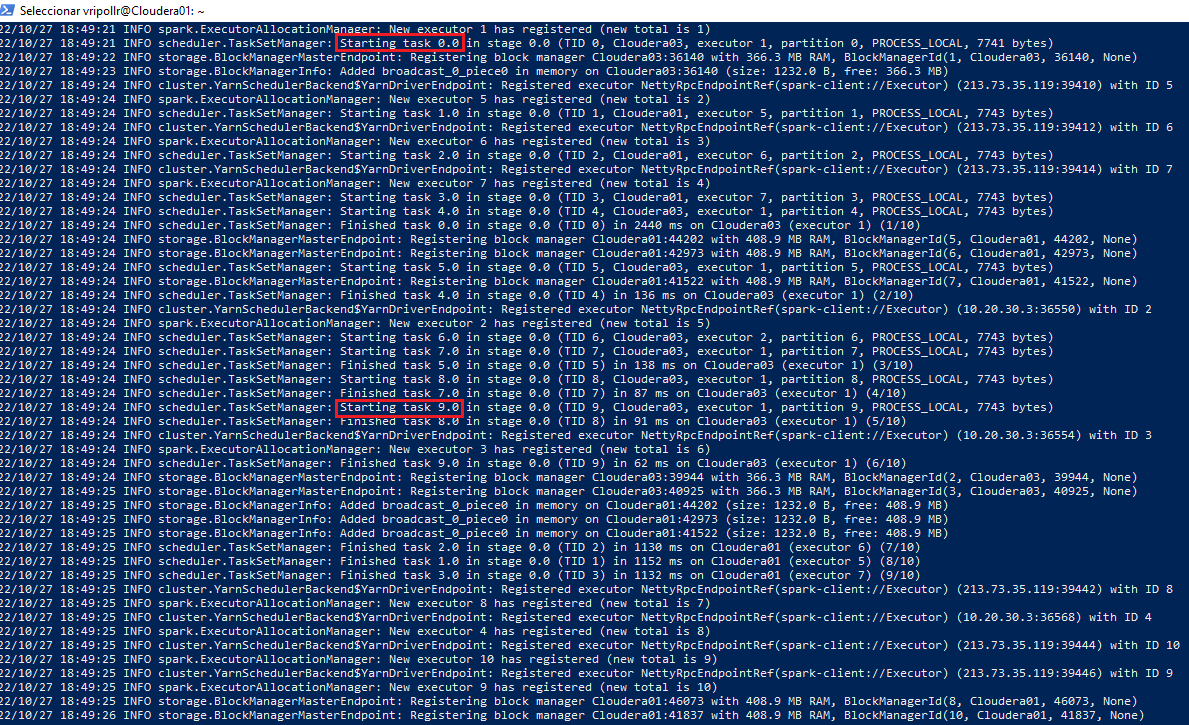

<h3 style='margin-left:18.0pt;text-indent:-18.0pt'><b>3.5<span
style='font:7.0pt "Times New Roman"'>&nbsp; </span></b>¿Cuántas
transformaciones se han invocado durante nuestro programa? (1 punto)</h3>

Si se consulta el listado de transformaciones en https://spark.apache.org/docs/latest/rdd-programming-guide.html#transformations y se utiliza el comando ctrl+f dentro del terminal para buscar coincidencias, se encuentran únicamente transformaciones de tipo map():

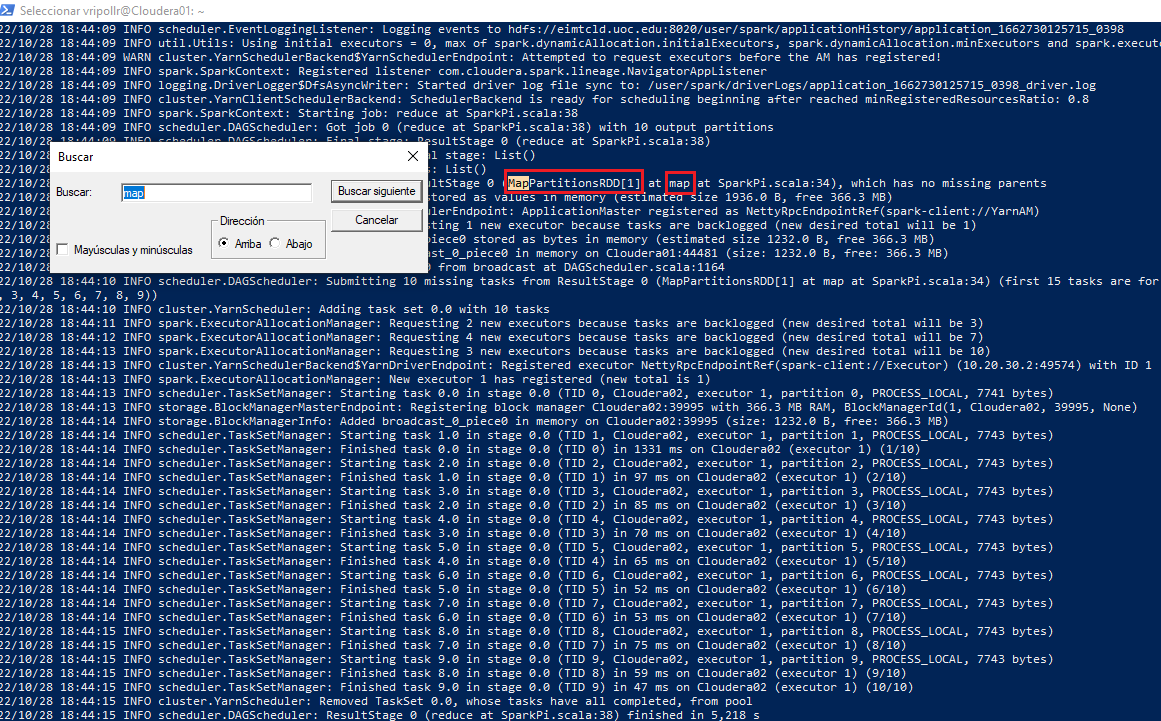

<h3 style='margin-left:18.0pt;text-indent:-18.0pt'><b>3.6<span
style='font:7.0pt "Times New Roman"'>&nbsp; </span></b>¿Cuántas acciones se han
invocado durante nuestro programa? (1 punto)</h3>

Si se consulta el listado de acciones en https://spark.apache.org/docs/latest/rdd-programming-guide.html#actions y se utiliza el comando ctrl+f dentro del terminal para buscar coincidencias, se encuentra únicamente la acción reduce():

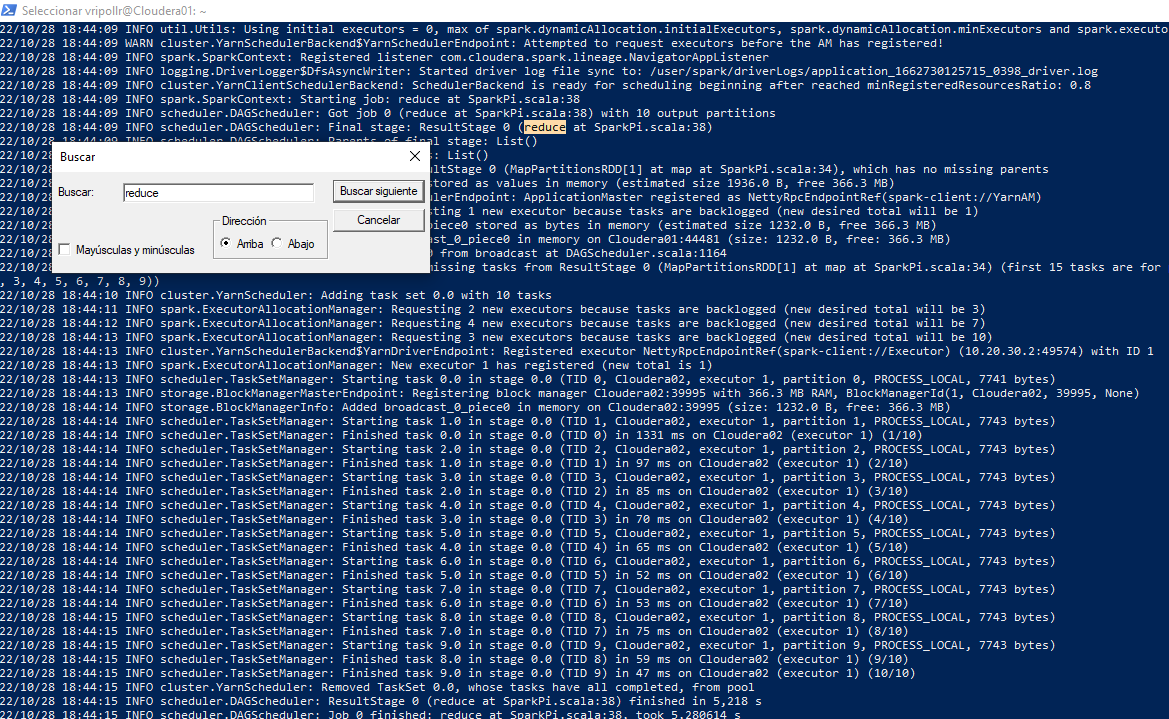

<h3 style='margin-left:18.0pt;text-indent:-18.0pt'><b>3.7<span style='font:7.0pt "Times New Roman"'>&nbsp; </span></b><span>¿Cuántos cores
totales de nuestro clúster han intervenido en nuestra ejecución? (1 punto)</span></span></h3>

Intervienen 8: Cloudera01:33601, Cloudera01:40014, Cloudera01:38524, Cloudera02:43486, Cloudera02:46433, Cloudera03:40729, Cloudera03:35936 y Cloudera03:37516.

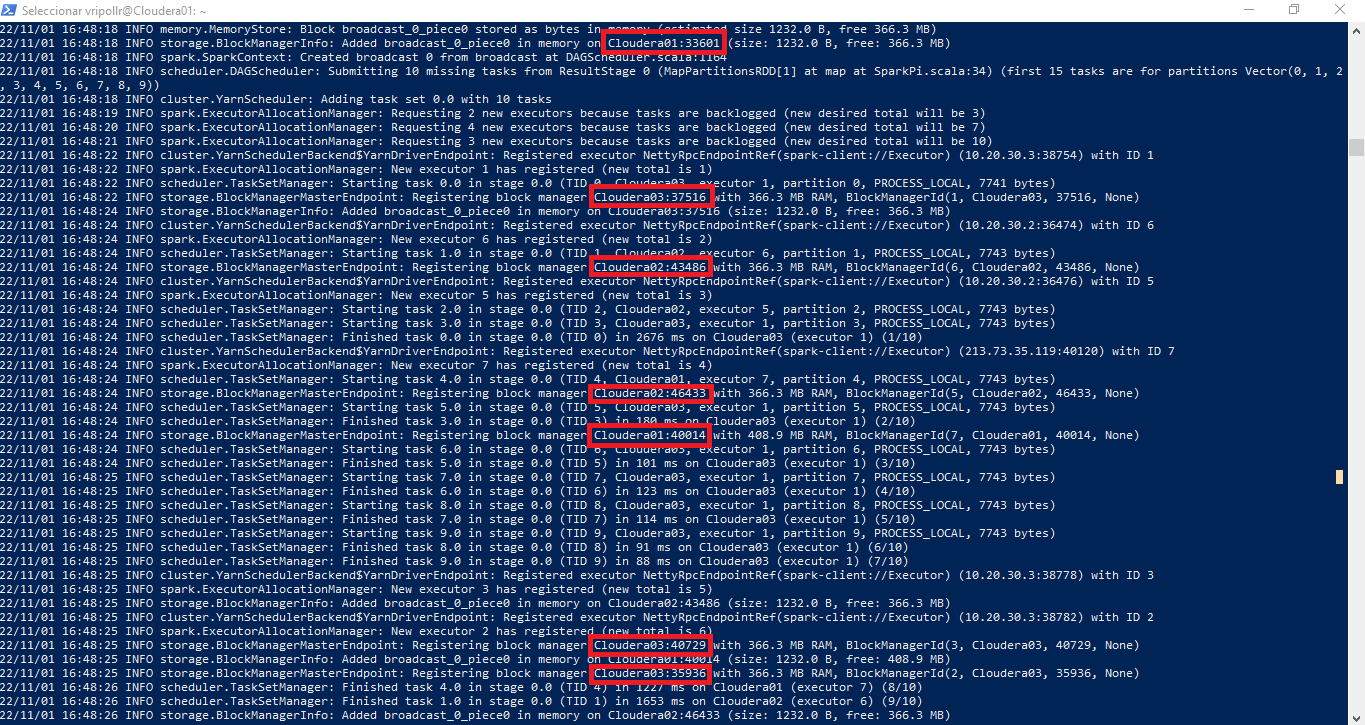

<h2 style='margin-left:18.0pt;text-indent:-18.0pt'>4<span style='font:7.0pt "Times New Roman"'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
</span>Gestión de aplicaciones en YARN (2.5 punto)</h2>

<p class=MsoNormal>Como ya sabéis, YARN es el encargado de manejar los recursos
de los nodos que forman el clúster de manera global y es él quien tiene la
responsabilidad de distribuir las aplicaciones para que se ejecuten de manera
paralelizada y balancear la carga entre ellas.</p>

<p class=MsoNormal>Una vez enviada una aplicación a YARN en modo cluster, esta
se ejecuta bajo su control, por eso, si queremos cancelar una aplicación, no
basta con hacer un <span style='font-size:9.0pt;line-height:115%;font-family:
"Courier New"'>cntr+c</span> sino que debemos indicárselo a YARN.</p>

<p class=MsoNormal>Para esta tarea y muchas otras, tenéis disponible el comando
<span style='font-size:9.0pt;line-height:115%;font-family:"Courier New"'>yarn</span>
en la terminal<a href="https://hadoop.apache.org/docs/stable/hadoop-yarn/hadoop-yarn-site/YarnCommands.html" name="_ftnref5" title=""><span
class=MsoFootnoteReference><span class=MsoFootnoteReference><span
style='font-size:12.0pt;line-height:115%;font-family:"Calibri",sans-serif'>[YARN Commands]</span></span></span></a>.
En este ejercicio vamos ver algunas de las posibilidades que ofrece.</p>

<p class=MsoNormal>Todas las respuestas a las preguntas siguientes deben
acompañarse de evidencias con capturas de pantalla.</p>

<p class=MsoNormal>Para este ejercicio, vamos a abrir dos terminales dentro del
JupyterLab, uno en cada pestaña. En el primero, volveremos a ejecutar la
aplicación SparkPi en modo clúster incrementando el número de muestras de 10 a
10000.</p>

<p class=MsoNormal>En el segundo, y mientras SparkPI se está ejecutando, debéis
consultar las aplicaciones que YARN está ejecutando mediante el comando <span
style='font-size:9.0pt;line-height:115%;font-family:"Courier New"'>yarn</span>.
</p>

<p class=MsoListParagraph style='text-indent:-18.0pt'><span style='font-family:
Symbol'>·<span style='font:7.0pt "Times New Roman"'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
</span></span>¿Cuál es la ID que se ha asignado (1.25 puntos)? </p>

En la primer pestaña se ha aplicado el comando spark-submit --class org.apache.spark.examples.SparkPi --master yarn --executor-memory 1G --deploy-mode cluster /opt/cloudera/parcels/CDH/lib/spark/examples/jars/spark-examples_2.11-2.4.0-cdh6.2.0.jar 10000
En la segunda, mientras se ejecutaba el anterior, se ha aplicado el comando yarn application -list -appStates RUNNING

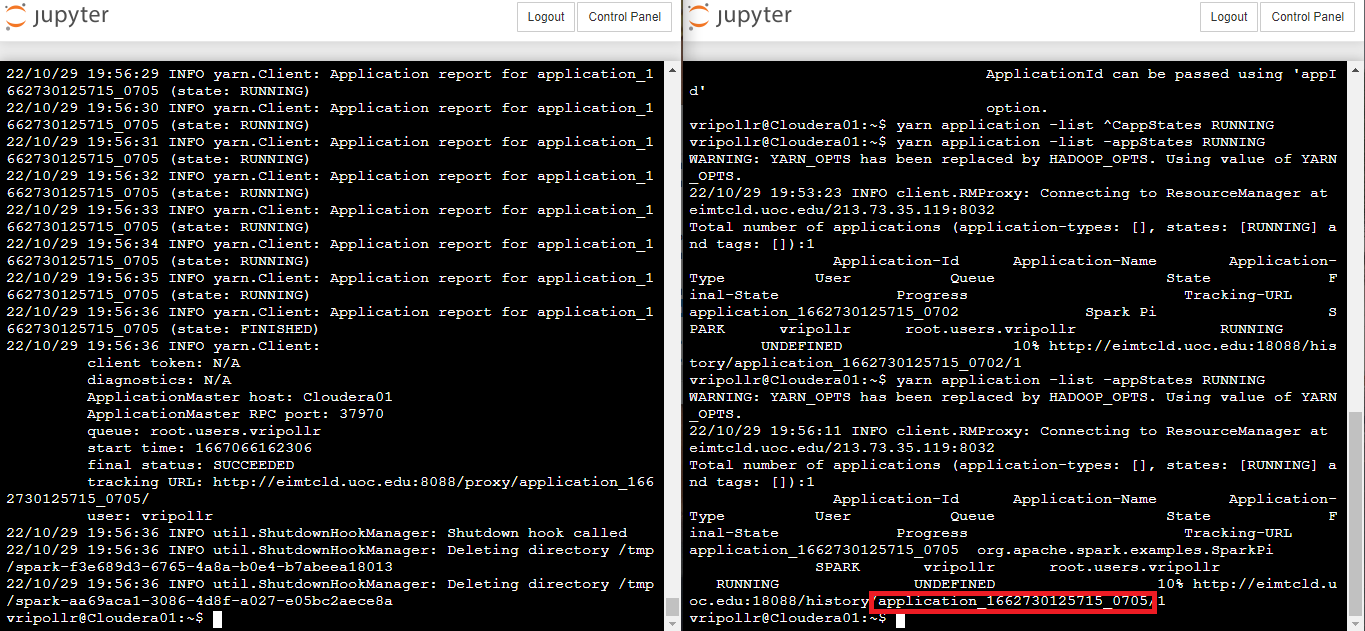

El ID asignado es application_1662730125715_0705

<p class=MsoNormal>Una vez obtengáis la ID, mientras nuestra aplicación esta
todavía en ejecución (tarda 40 segundos en ejecutarse), utilizad el comando <span
style='font-size:9.0pt;line-height:115%;font-family:"Courier New"'>yarn</span>
para parar su ejecución.</p>

<p class=MsoListParagraph style='text-indent:-18.0pt'><span style='font-family:
Symbol'>·<span style='font:7.0pt "Times New Roman"'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
</span></span>¿Qué comando habéis ejecutado (1.25 puntos)?</p>

</div>

Para parar la aplicación se puede usar el comando yarn application -kill <ID de la aplicación>. Nótese que en cada spark-submit la ID cambia, en la siguiente imagen primero se ha tenido que aplicar el comando yarn application -list -appStates RUNNING para conocer la ID actual y luego finalizarla con yarn application -kill application_1662730125715_0712:

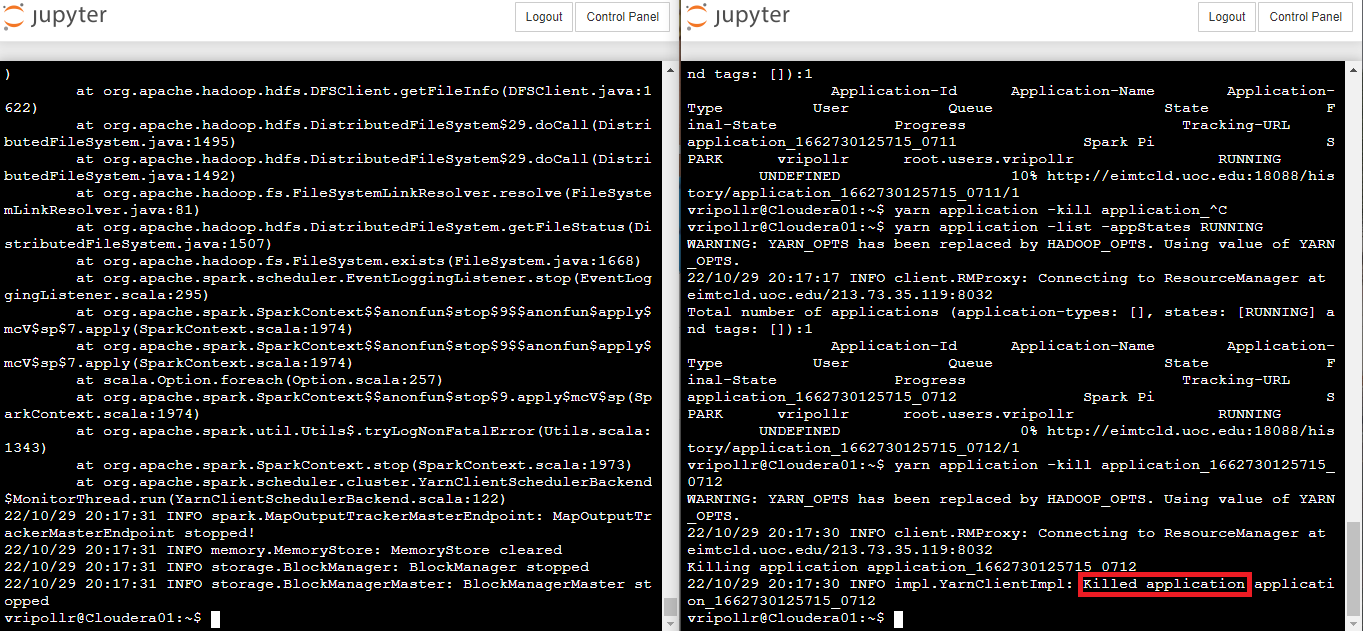